## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

In this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

294478 total row in this dataset

In [3]:
df.count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

c. The number of unique users in the dataset.

290584 unique user in this dataset

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

The conversion rate is 0.12

In [5]:
df[df['converted']==1]['user_id'].nunique()

35173

In [6]:
35173/float(290584)


0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

There's 3893 time that new_page and treatment don't line up

In [7]:
df.loc[((df['group']=='treatment')& (df['landing_page']!='new_page')) | ((df['group']!='treatment')& (df['landing_page']=='new_page'))].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

No row have missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2=df.loc[((df['group']=='treatment')& (df['landing_page']=='new_page')) | ((df['group']=='control')& (df['landing_page']=='old_page'))]

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

290584 unique user in df2

In [12]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

user_id 773192

In [13]:
df2[df2['user_id'].duplicated()==True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

2017-01-14 02:55:59.590927	treatment	new_page	0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.reset_index(inplace=True)

In [15]:
df2[df2['user_id'].duplicated()==True]

,index,user_id,timestamp,group,landing_page,converted
2862,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
df2.drop([2862],inplace=True)

C:\Users\MZLKDL\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

Regardless the page, convert rate is 11.9%

In [17]:
df2.describe()


,index,user_id,converted
count,290584.000000,290584.000000,290584.000000
mean,147271.231929,788004.876222,0.119597
std,84998.147486,91224.735468,0.324490
min,0.000000,630000.000000,0.000000
25%,73669.750000,709034.750000,0.000000
50%,147301.500000,787995.500000,0.000000
75%,220877.250000,866956.250000,0.000000
max,294477.000000,945999.000000,1.000000


b. Given that an individual was in the `control` group, what is the probability they converted?

The control group converted rate is 12%

In [18]:
df2.groupby('group').describe()

converted                                                  index  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145310.0  0.118808  0.323564  0.0  0.0  0.0  0.0  1.0  145310.0   

                           ...                           user_id  \
                   mean    ...           75%       max     count   
group                      ...                                     
control    147382.23890    ...     220915.75  294476.0  145274.0   
treatment  147160.25246    ...     220822.50  294477.0  145310.0   

                                                                       \
                    mean           std       min        25%       50%   
group                                                                   
control    788164.072594  91287.914601  630002.0  709279.50  788128.5   
treatment  787845.719290  91161.564429  630000.0  708745.75  787876.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.75  945999.0  

[2 rows x 24 columns]

c. Given that an individual was in the `treatment` group, what is the probability they converted?

The treatment group converted rate is 11.8%

d. What is the probability that an individual received the new page?

The probablity is 50%

In [19]:
df2.groupby('landing_page').count()/df2.count()

,converted,group,index,landing_page,timestamp,user_id
landing_page,,,,,,
new_page,0.500062,0.500062,0.500062,NaN,0.500062,0.500062
old_page,0.499938,0.499938,0.499938,NaN,0.499938,0.499938


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

From question a through d, the control group have 0.1578% more converation rate than the treatment group, Also the treatment group conversation rate also below mean value 11.9%. Considering the landing page probablility is almost equal, there's no evidance showing that treatment group new landing page leads more conversion rate.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

My null hypotheses will be old page is better, so **$p_{old}$** - **$p_{new}$**>0

So on the contrary the alternative hypothesis is new page equal or better than old page,  **$p_{old}$** - **$p_{new}$**<=0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [190]:
pnew=df2['converted'].mean()
pnew

0.11959708724499628

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [191]:
pold=df2['converted'].mean()
pold

0.11959708724499628

0.11959708724499628

c. What is $n_{new}$?

In [246]:
nnew=df2[df2['group']=='treatment'].count()[0]
nnew

145310

d. What is $n_{old}$?

In [247]:
nold=df2[df2['group']=='control'].count()[0]
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [280]:
new_page_converted=np.random.binomial(1,pnew,nnew)
s_pnew=new_page_converted.mean()

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [279]:
old_page_converted=np.random.binomial(1,pold,nold)
s_pold=old_page_converted.mean()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [281]:
s_pnew-s_pold

0.00026650481499866652

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [282]:
p_diffs=[]
for _ in range(10000):
    s_new_t=np.random.binomial(1,pnew,nnew).mean()
    s_pold_t=np.random.binomial(1,pold,nold).mean()
    p_diffs.append(s_new_t-s_pold_t)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [386]:
a_diff=df2.groupby('group')['converted'].mean()['treatment']-df2.groupby('group')['converted'].mean()['control']
a_diff

-0.0015782389853555567

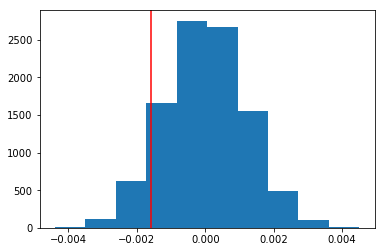

In [387]:
plt.hist(p_diffs)
plt.axvline(x=a_diff,color='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [389]:
(p_diffs>a_diff).mean()

0.90649999999999997

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value we computed in part j called p-value, in this case the p-value=0.90, which indicate there's no significant difference between the new and old page in this test.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [315]:
import statsmodels.api as sm

convert_old = df2.query('group=="control"')[df2['converted']==1].count()[0]
convert_new = df2.query('group=="treatment"')[df2['converted']==1].count()[0]
n_old = df2.query('group=="control"').count()[0]
n_new = df2.query('group=="treatment"').count()[0]
convert_old,convert_new,n_old,n_new

C:\Users\MZLKDL\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MZLKDL\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [391]:
z_score, p_value = sm.stats.proportions_ztest([17489, 17264], [145274, 145310],alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

In [392]:
from scipy.stats import norm
norm.cdf(z_score)

0.90505831275902449

In [393]:
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Since the z_score 1.3109 < 1.9599, we rejected the alternative that the difference between the two proportions is different from zero. In other world the new page is not significant different than the old page. Also the p-value calculated is corresponding in parts j.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

The converted result is not continued variable so we should use Logistic Regression Model

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [394]:
lr=df2.copy()
lr['intercept']=1
lr[['control','ab_page']]=pd.get_dummies(lr['group'])

In [404]:
lr.drop('control',axis=1,inplace=True)

In [405]:
lr.head()

,index,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [406]:
lm=sm.Logit(lr['converted'],lr[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [398]:
results=lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:49:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associate with ab_page is 0.19. And there's big difference that the p-value in Part II(0.9). The difference is in the alternitive hypotheses, in Part II it's if p_new != p_old so either new or old page will have a better conversion rate. In Part III we only concerned about if the page factor have any correlation with the conversion rate, no matther what direction. That's why the p-value in part III is way bigger than part II.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

By adding other factors we can have more correlation coeffcient, and this will provide a better fit on the model. In this case we can try to take the timestamp to see if it related in the result. However there's some disadvantages for example correlated errors will occurs.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [413]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(lr.set_index('user_id'), how='inner')

In [408]:
df_new.head()


,country,index,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,,
834778,UK,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,106686,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [409]:
df_new[['UK','US','CA']]=pd.get_dummies(df_new['country'])

In [410]:
df_new.head()

,country,index,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,106686,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [411]:
lm=sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','CA']])

In [412]:
results=lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:               2.323e-05
Time:                        11:51:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK            -0.0506      0.028     -1.784      0.074      -0.106       0.005
CA            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

After adding the country column, from the regression result we can see the p-value for country still well over 0.05, which means there's no significant correlation between country variable with the converation result. 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.